In [2]:
import pandas as pd
import numpy as np

In [3]:
mydata = pd.read_csv(r"C:\Users\Keara\Downloads\Intro_Data_Mining\practise_data.csv" , sep = ',')

In [4]:
mydata.head(20)

,Customer_ID,rev_Mean,mou_Mean,uniqsubs,ethnic,creditcd,churn
0,1000001,23.9975,219.25,2,N,Y,1
1,1000002,57.4925,482.75,1,Z,Y,0
2,1000003,16.9900,10.25,1,N,Y,1
3,1000004,38.0000,7.50,1,U,Y,0
4,1000005,55.2300,570.50,1,I,Y,0
5,1000006,82.2750,1312.25,2,U,Y,0
6,1000007,17.1450,0.00,2,N,Y,1
7,1000008,38.0525,682.50,1,S,Y,0
8,1000009,97.3375,1039.00,1,F,N,0
9,1000010,31.6625,25.50,2,N,Y,0


In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer_ID  1000 non-null   int64  
 1   rev_Mean     997 non-null    float64
 2   mou_Mean     997 non-null    float64
 3   uniqsubs     1000 non-null   int64  
 4   ethnic       979 non-null    object 
 5   creditcd     979 non-null    object 
 6   churn        1000 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [6]:
#dropping first column
df = mydata.drop(["Customer_ID"], axis = 1)

In [7]:
df.head()

,rev_Mean,mou_Mean,uniqsubs,ethnic,creditcd,churn
0,23.9975,219.25,2,N,Y,1
1,57.4925,482.75,1,Z,Y,0
2,16.9900,10.25,1,N,Y,1
3,38.0000,7.50,1,U,Y,0
4,55.2300,570.50,1,I,Y,0


In [8]:
#handling with missing values
num_vars = list(df.loc[:, df.dtypes != 'object'].columns)   #getting the numerical columns

In [9]:
df[num_vars].isnull().sum()

rev_Mean    3
mou_Mean    3
uniqsubs    0
churn       0
dtype: int64

In [10]:
for var in num_vars:
    df[var] = df[var].fillna(df[var].median())

df[num_vars].isnull().sum()

rev_Mean    0
mou_Mean    0
uniqsubs    0
churn       0
dtype: int64

In [11]:
cat_vars = list(df.loc[:, df.dtypes == 'object'].columns)
df[cat_vars].isnull().sum()

ethnic      21
creditcd    21
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer

myimputer = SimpleImputer(missing_values = np.nan, 
                          strategy = 'most_frequent')

myimputer = myimputer.fit(df[cat_vars])
df[cat_vars] = myimputer.transform(df[cat_vars])

In [13]:
df[cat_vars].isnull().sum()

ethnic      0
creditcd    0
dtype: int64

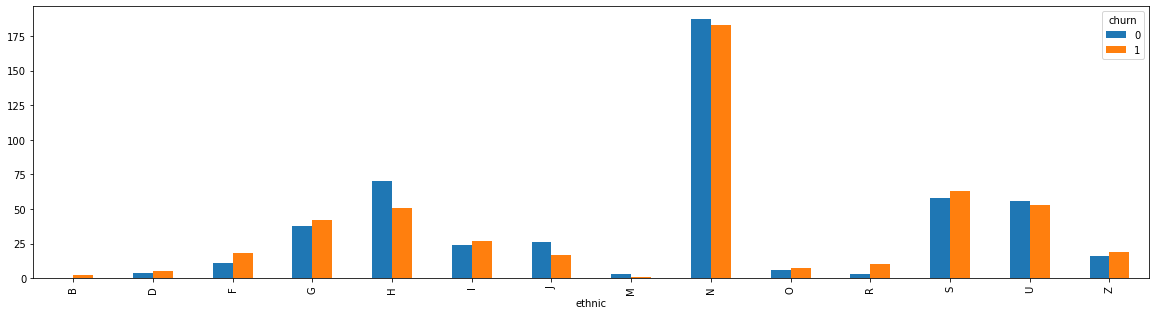

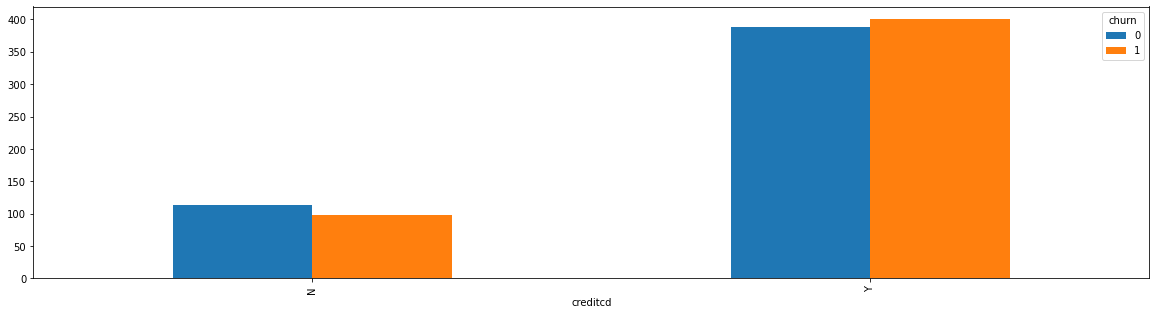

In [14]:
#display the distrubution of cat variables with 
#respect to churn information
for col in cat_vars:
    df.groupby([col, 'churn']).size().unstack().plot(kind='bar', figsize=(20, 5))

array([<AxesSubplot:title={'center':'rev_Mean'}>,
       <AxesSubplot:title={'center':'mou_Mean'}>,
       <AxesSubplot:title={'center':'uniqsubs'}>], dtype=object)

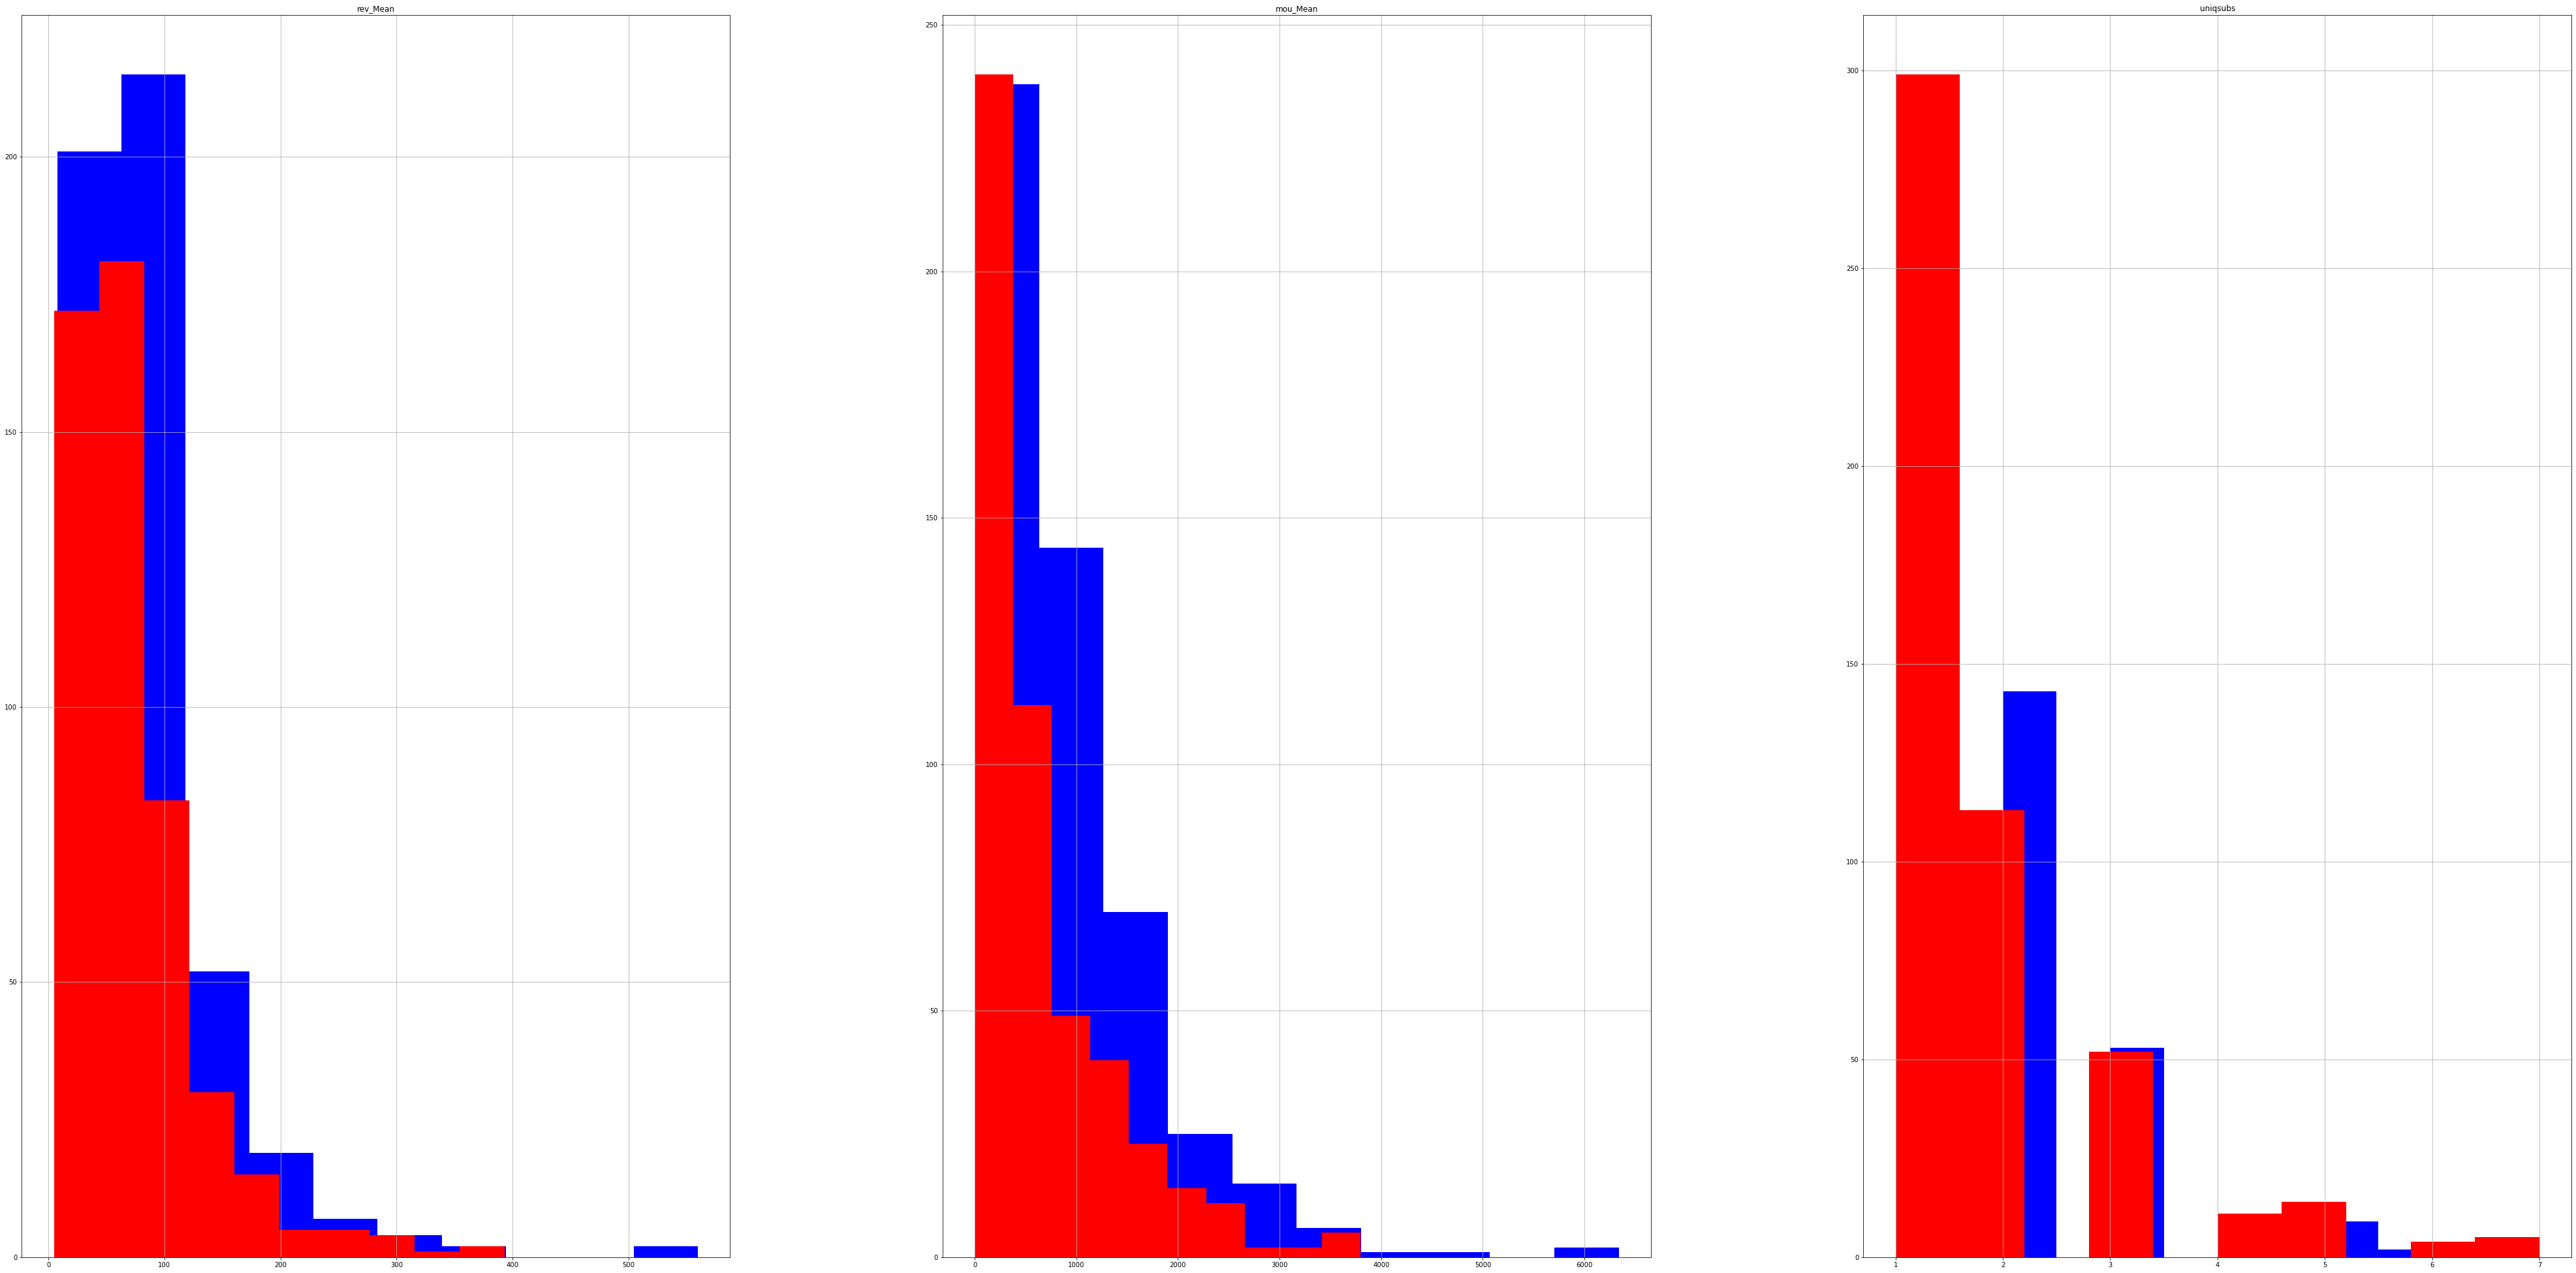

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(70, 35))
df[df['churn'] == 0][num_vars[0:-1]].hist(bins = 10, 
  color = "blue", ax=ax)
df[df['churn'] == 1][num_vars[0:-1]].hist(bins = 10, 
  color = "red", ax=ax)

In [16]:
#handling the extreme values (anomalies) in the dataset
for n in num_vars:
    print(df[n].mean())
    print(df[n].std())
    
    outliers = df[df[n] > (df[n].mean() + 2*df[n].std())][n]
    df.loc[outliers.index, n] = df[n].mean() + 2*df[n].std()

78.68520500007013
58.59922620363399
752.8255833336699
786.0368670590509
1.684
1.051308351174502
0.498
0.500246185638879


array([<AxesSubplot:title={'center':'rev_Mean'}>,
       <AxesSubplot:title={'center':'mou_Mean'}>,
       <AxesSubplot:title={'center':'uniqsubs'}>], dtype=object)

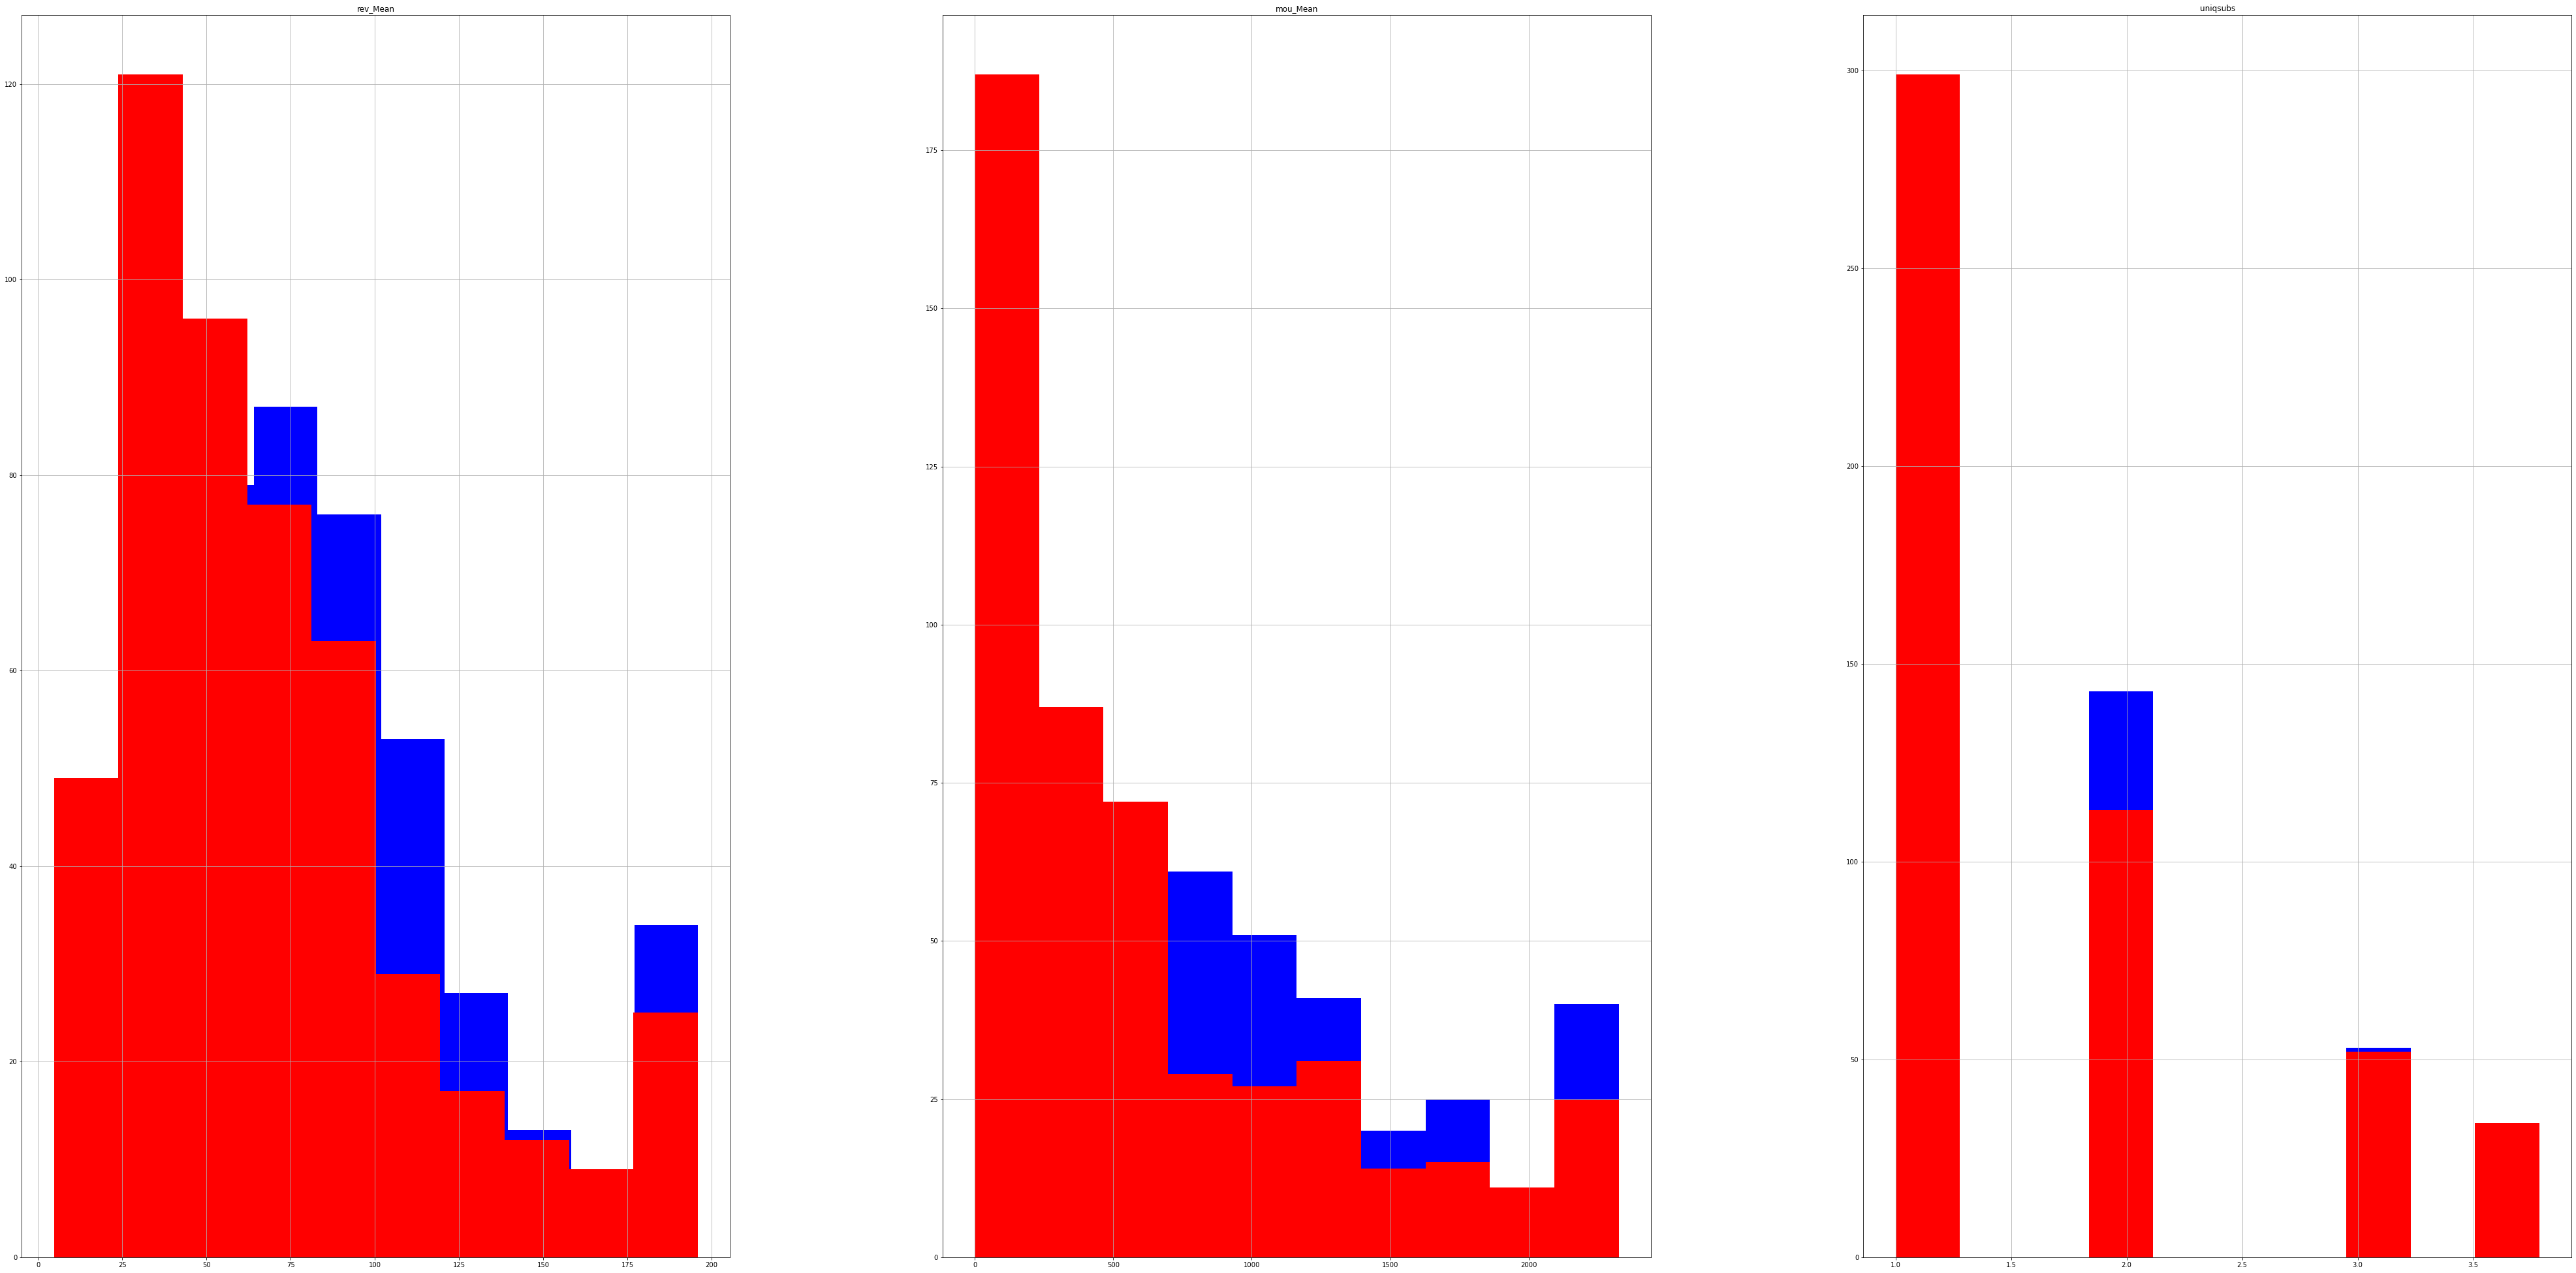

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(70, 35))
df[df['churn'] == 0][num_vars[0:-1]].hist(bins = 10, 
  color = "blue", ax=ax)
df[df['churn'] == 1][num_vars[0:-1]].hist(bins = 10, 
  color = "red", ax=ax)

In [18]:
corrs = df.corr(method = 'spearman')['churn']

abs(corrs).sort_values(ascending = False)

churn       1.000000
mou_Mean    0.183872
rev_Mean    0.155921
uniqsubs    0.016376
Name: churn, dtype: float64

In [19]:
from sklearn.preprocessing import StandardScaler

myscaler = StandardScaler()
myscaler = myscaler.fit(df[num_vars])
df[num_vars] = myscaler.transform(df[num_vars])

In [20]:
from sklearn.preprocessing import MinMaxScaler

myscaler2 = MinMaxScaler()
myscaler2 = myscaler2.fit(df[num_vars])
df[num_vars] = myscaler2.transform(df[num_vars])

In [21]:
df[num_vars].mean()
df[num_vars].min()
df[num_vars].max()

rev_Mean    1.0
mou_Mean    1.0
uniqsubs    1.0
churn       1.0
dtype: float64

array([<AxesSubplot:title={'center':'rev_Mean'}>,
       <AxesSubplot:title={'center':'mou_Mean'}>,
       <AxesSubplot:title={'center':'uniqsubs'}>], dtype=object)

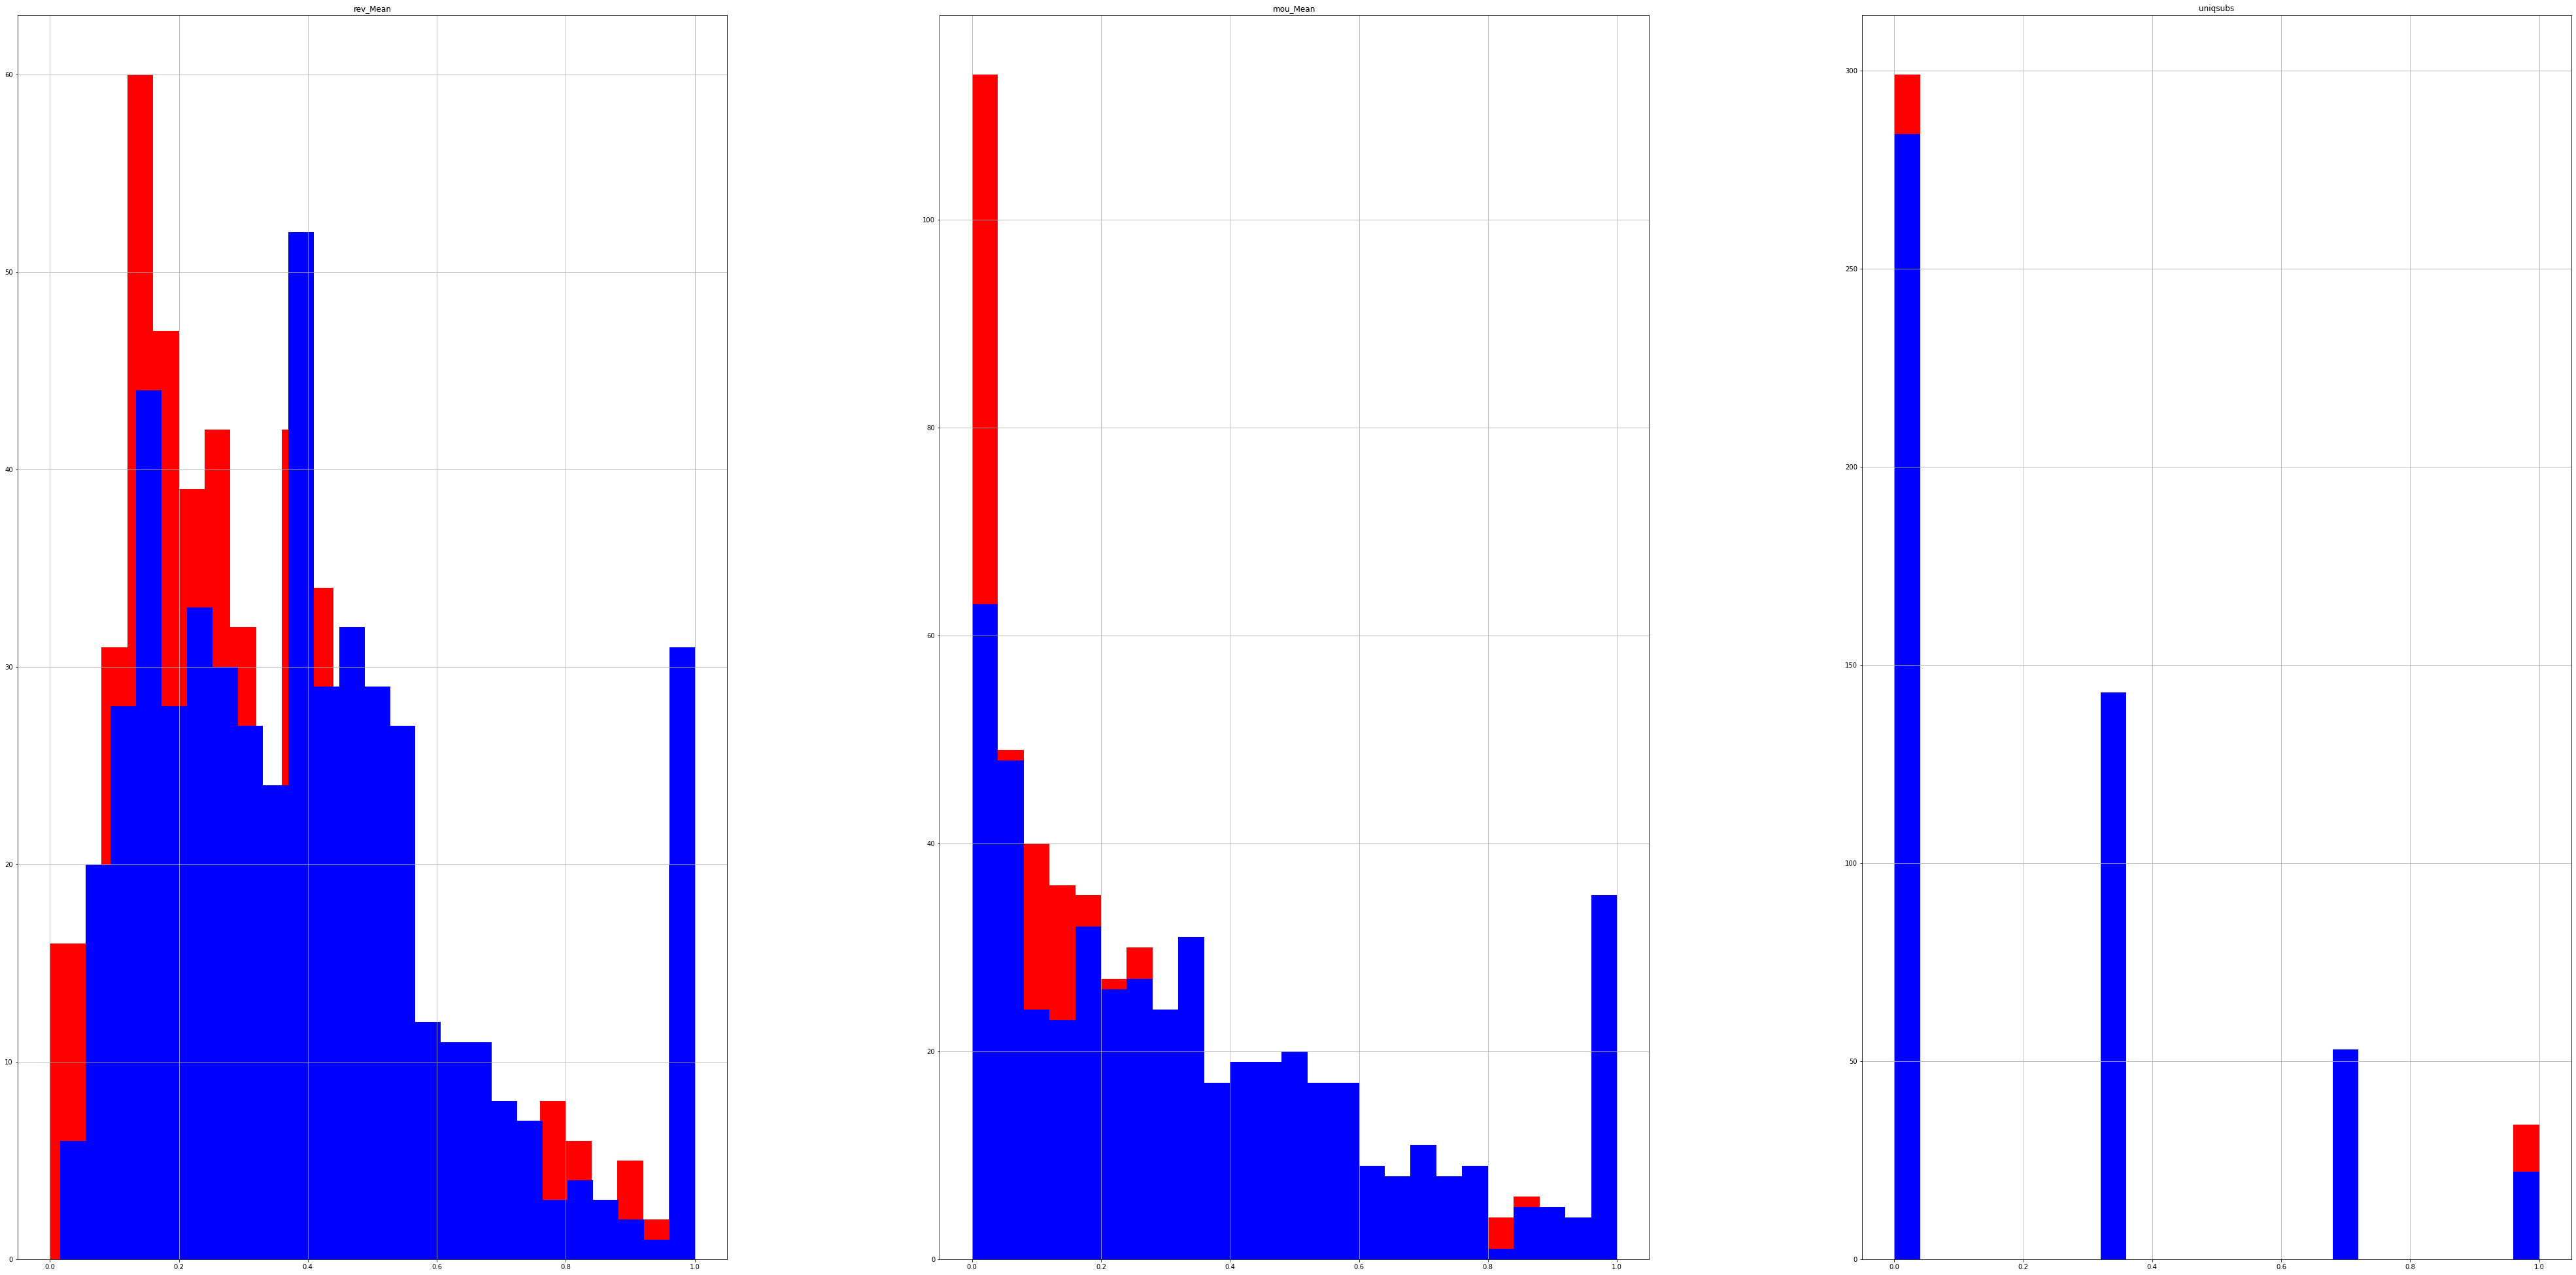

In [22]:

fig, ax = plt.subplots(1, 3, figsize=(70, 35))
df[df['churn'] == 1][num_vars[0:-1]].hist(bins = 25, 
  color = "red", ax=ax)
df[df['churn'] == 0][num_vars[0:-1]].hist(bins = 25, 
  color = "blue", ax=ax)

# Principle component analysis


In [23]:
mydata = pd.read_csv(r"C:\Users\Keara\Downloads\Intro_Data_Mining\practise_data.csv" , sep = ',')

In [24]:
mydata.head()

,Customer_ID,rev_Mean,mou_Mean,uniqsubs,ethnic,creditcd,churn
0,1000001,23.9975,219.25,2,N,Y,1
1,1000002,57.4925,482.75,1,Z,Y,0
2,1000003,16.9900,10.25,1,N,Y,1
3,1000004,38.0000,7.50,1,U,Y,0
4,1000005,55.2300,570.50,1,I,Y,0


In [25]:
mydata.describe()

,Customer_ID,rev_Mean,mou_Mean,uniqsubs,churn
count,1.000000e+03,997.000000,997.000000,1000.000000,1000.000000
mean,1.000500e+06,78.721991,753.542711,1.684000,0.498000
std,2.888194e+02,58.683565,787.110771,1.051308,0.500246
min,1.000001e+06,4.750000,0.000000,1.000000,0.000000
25%,1.000251e+06,38.535000,155.750000,1.000000,0.000000
50%,1.000500e+06,66.460000,514.500000,1.000000,0.000000
75%,1.000750e+06,97.337500,1107.250000,2.000000,1.000000
max,1.001000e+06,559.790000,6336.250000,7.000000,1.000000


In [26]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer_ID  1000 non-null   int64  
 1   rev_Mean     997 non-null    float64
 2   mou_Mean     997 non-null    float64
 3   uniqsubs     1000 non-null   int64  
 4   ethnic       979 non-null    object 
 5   creditcd     979 non-null    object 
 6   churn        1000 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [27]:
print(mydata.shape[0]) #number of samples (rows, records) 
print(mydata.shape[1]) #number of features (variables, columns)
print(mydata.shape) #number of features (variables, columns

1000
7
(1000, 7)


In [28]:
df = mydata.iloc[:, 1:mydata.shape[1]] #remove customer id

In [29]:
df.head()


,rev_Mean,mou_Mean,uniqsubs,ethnic,creditcd,churn
0,23.9975,219.25,2,N,Y,1
1,57.4925,482.75,1,Z,Y,0
2,16.9900,10.25,1,N,Y,1
3,38.0000,7.50,1,U,Y,0
4,55.2300,570.50,1,I,Y,0


In [30]:
#handling missing values
#determine the numerical features
#list down numerical features
num_vars=list(df.loc[:,df.dtypes!='object'].columns[0:-1]) #churn column is discarded
len(num_vars)

3

In [31]:
df[num_vars].isnull().sum()

rev_Mean    3
mou_Mean    3
uniqsubs    0
dtype: int64

In [32]:
#fill the numerical missing values with mean
for var in num_vars:
    df[var] = df[var].fillna(df[var].mean())

df[num_vars].isnull().sum()

rev_Mean    0
mou_Mean    0
uniqsubs    0
dtype: int64

In [33]:
#missing value handling in categorical variables
#histogram of categorical variables according to churn information
cat_vars=list(df.loc[:,df.dtypes=='object'].columns)
len(cat_vars)

2

In [34]:
df[cat_vars].isnull().sum()

ethnic      21
creditcd    21
dtype: int64

In [35]:
from sklearn.impute import SimpleImputer

myimputer2 = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

myimputer2 = myimputer2.fit(df[cat_vars])
df[cat_vars] = myimputer2.transform(df[cat_vars])
df[cat_vars].isnull().sum()

ethnic      0
creditcd    0
dtype: int64

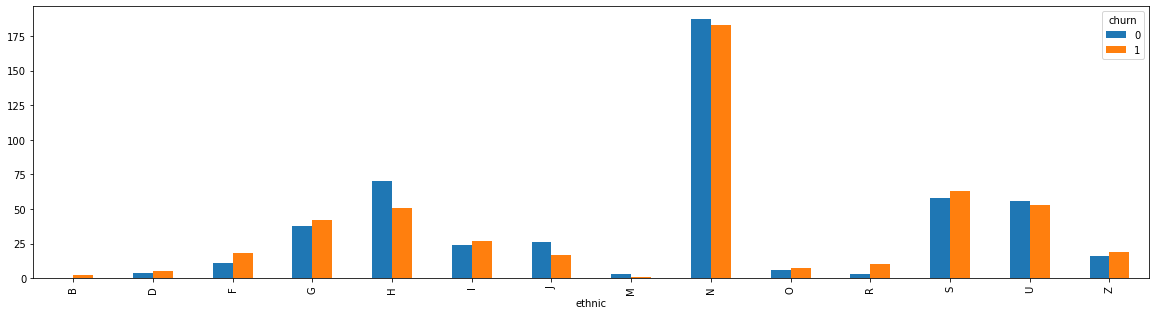

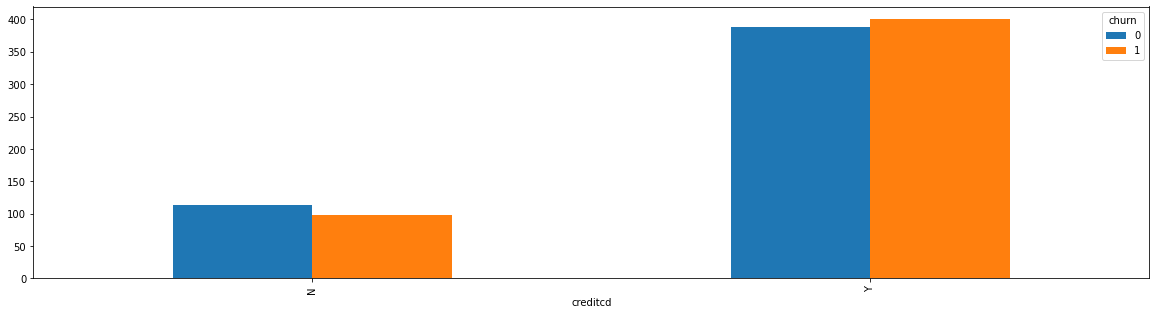

In [36]:
#display categorical data
for col in cat_vars:   #show only first 5 variables as example
    df.groupby([col, 'churn']).size().unstack().plot(kind='bar', stacked=False, figsize=(20,5))

array([<AxesSubplot:title={'center':'rev_Mean'}>,
       <AxesSubplot:title={'center':'mou_Mean'}>,
       <AxesSubplot:title={'center':'uniqsubs'}>], dtype=object)

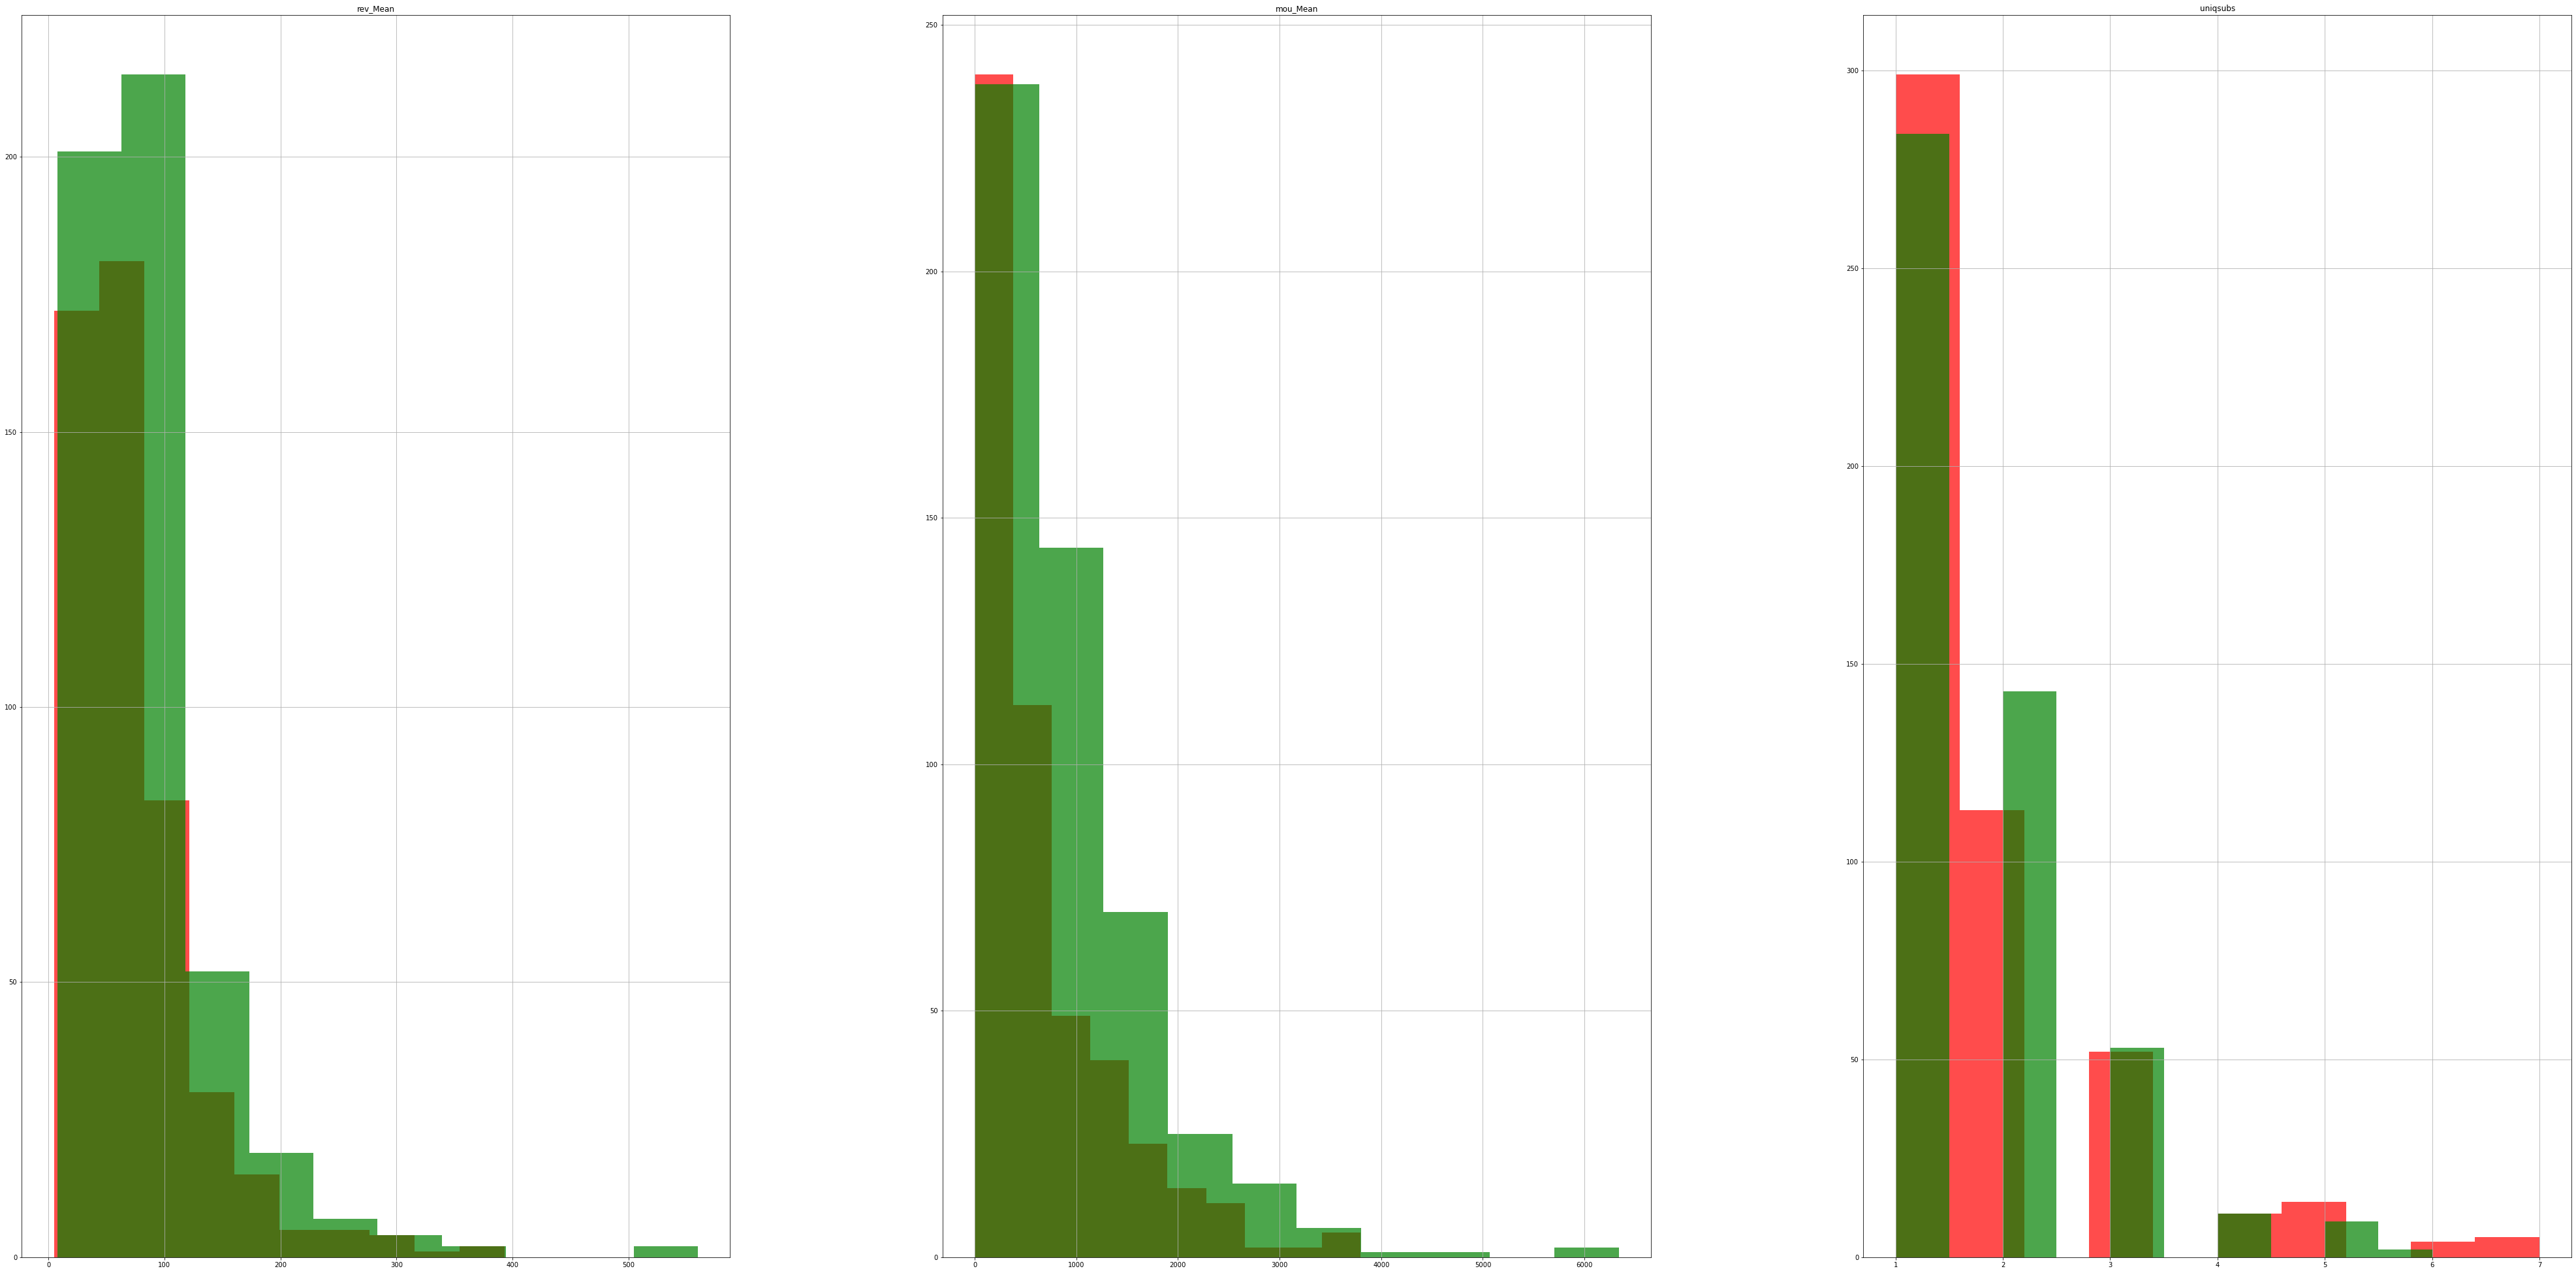

In [37]:
import matplotlib.pyplot as plt

#histogram of numerical variables according to churn information
#the first 20 variables
fig, ax = plt.subplots(1, 3, figsize=(70, 35))
df[df['churn'] == 1][num_vars[0:]].hist(bins=10, color="red", alpha=0.7, ax=ax)
df[df['churn'] == 0][num_vars[0:]].hist(bins=10, color="green", alpha=0.7, ax=ax)

In [38]:
#calculate spearman correlations between numerical variables and churn information
#spearman does not make normality assumption and it can capture non-linear relations also
corrs = df.corr(method='spearman')['churn']

abs(corrs).sort_values(ascending = False)


churn       1.000000
mou_Mean    0.182679
rev_Mean    0.154802
uniqsubs    0.015611
Name: churn, dtype: float64

In [39]:
#standardization
from sklearn.preprocessing import StandardScaler

myscaler = StandardScaler()
myscaler = myscaler.fit(df[num_vars])
df[num_vars] = myscaler.transform(df[num_vars])

In [40]:
#mutual information 
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_regression

#mutual information score for categorical variables
m_info_scores = np.empty(len(cat_vars))
count = 0
for n in cat_vars:
    m_info_scores[count] = mutual_info_score(df['churn'], df[n])
    count = count + 1

In [41]:
print(m_info_scores)    
top_cat_variables = np.flip((m_info_scores.argsort()))
#sel_cat_vars = top_variables[0:4]
#sel_cat_vars_list = np.ndarray.tolist(df.columns.values[sel_cat_vars])
    
#mutual information for numerical variables

mut_info_num_vars = mutual_info_regression(df[num_vars], df['churn'], n_neighbors=5)

top_num_variables = np.flip(mut_info_num_vars.argsort())

[0.00776729 0.00068772]


In [42]:
#dimensionality reduction with PCA
from sklearn.decomposition import PCA

mypca = PCA(n_components=2) #number of components between 0 and 1
                            #amount of variance taht will be kept is given

#If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select the
#number of components such that the amount of variance that needs to be
#explained is greater than the percentage specified by n_components.
#mypca = PCA(n_components=0.75) #number of components between 0 and 1
                            #amount of variance taht will be kept is given
                            
    
pca_obj = mypca.fit(df[num_vars])

In [43]:
print(mypca.explained_variance_ratio_)
print(sum(mypca.explained_variance_ratio_))

pca_features = mypca.transform(df[num_vars])

[0.62041632 0.32095743]
0.9413737529306451


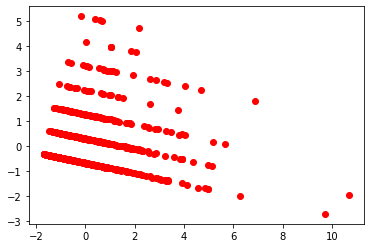

In [45]:
pca_df = pd.DataFrame(data = pca_features, columns = ['pca1', 'pca2'])

plt.plot(pca_df['pca1'], pca_df['pca2'], 'ro')




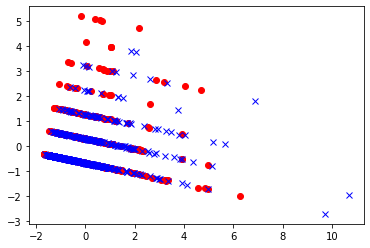

In [46]:
#plot each class separately
plt.plot(pca_df.loc[df['churn']==1, 'pca1'], pca_df.loc[df['churn']==1, 'pca2'], 'ro')
plt.plot(pca_df.loc[df['churn']==0, 'pca1'], pca_df.loc[df['churn']==0, 'pca2'], 'bx')

In [47]:
#data frame without numerical features
df_temp = df.drop(num_vars, axis = 1)

#combine pca features with categorical variables
frames = [pca_df, df_temp]

df_all = pd.concat([pca_df, df_temp], axis=1, sort=False)

In [48]:
df_all.head(10)

,pca1,pca2,ethnic,creditcd,churn
0,-1.056141,0.529880,N,Y,1
1,-0.622231,-0.535079,Z,Y,0
2,-1.517279,-0.347727,N,Y,1
3,-1.271749,-0.402929,U,Y,0
4,-0.571481,-0.543949,I,Y,0
5,0.596358,0.190324,U,Y,0
6,-1.330530,0.585175,N,Y,1
7,-0.675353,-0.517407,S,Y,0
8,0.338978,-0.734876,F,N,0
9,-1.136689,0.542390,N,Y,0
